In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
DATA_FOLDER = 'data/wiki_crop/'

In [81]:
import os

def get_image_paths(id):
    return [DATA_FOLDER + id + '/' + f for f in os.listdir(DATA_FOLDER + id) if f.endswith('.jpg')]

# get all image paths
image_paths = [get_image_paths(str(i).zfill(2)) for i in range(100)]

image_paths = np.concatenate(image_paths)

In [82]:
images = [plt.imread(image_paths[i]) for i in range(100)]

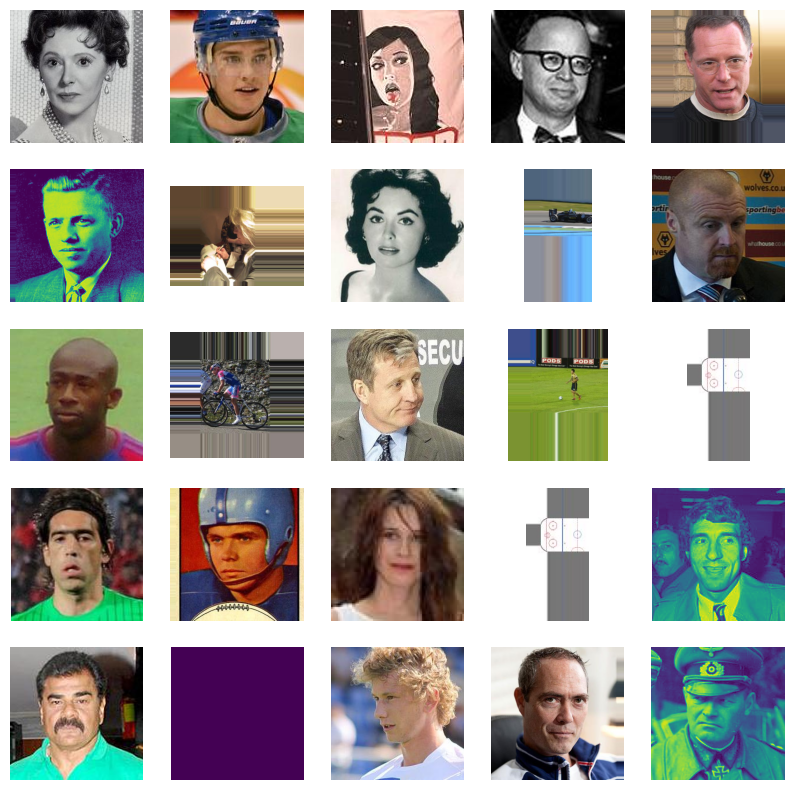

In [51]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i, j].imshow(images[i * 10 + j])
        axes[i, j].axis('off')

plt.show()

In [50]:
def extractSubImage(img, box, crop_margin=[0.4, 0.4, 0.4, 0.4]):
    # size of face
    orig_size = [box[4] - box[2] + 1, box[3] - box[1] + 1]

    # add margin
    full_crop = [round(box[1] - crop_margin[0] * orig_size[1]),
                 round(box[2] - crop_margin[1] * orig_size[0]),
                 round(box[3] + crop_margin[2] * orig_size[1]),
                 round(box[4] + crop_margin[3] * orig_size[0])]

    # size of face with margin
    new_size = [full_crop[4] - full_crop[2] + 1, full_crop[3] - full_crop[1] + 1]

    # ensure that the region cropped from the original image with margin
    # doesn't go beyond the image size
    crop = [max(full_crop[1], 1), max(full_crop[2], 1),
            min(full_crop[3], img.shape[1]), min(full_crop[4], img.shape[0])]

    # size of the actual region being cropped from the original image
    crop_size = [crop[4] - crop[2] + 1, crop[3] - crop[1] + 1]

    # create new image
    new_img = np.zeros((new_size[0], new_size[1], img.shape[2]), dtype=np.float32)

    # coordinates of region taken out of the original image in the new image
    new_location = [crop[1] - full_crop[1] + 1, crop[2] - full_crop[2] + 1,
                    crop[1] - full_crop[1] + crop_size[1], crop[2] - full_crop[2] + crop_size[0]]

    # coordinates of the face in the new image
    obj_location = [new_location[1] + box[1] - crop[1] + 1, new_location[2] + box[2] - crop[2] + 1,
                    new_location[3] + box[3] - crop[3] + 1, new_location[4] + box[4] - crop[4] + 1]

    # do the crop
    new_img[new_location[2]:new_location[4], new_location[1]:new_location[3], :] = img[crop[2]:crop[4], crop[1]:crop[3], :]

    # if margin goes beyond the size of the image, repeat last row of pixels
    if new_location[2] > 1:
        new_img[0:new_location[2] - 1, :, :] = np.repeat(new_img[new_location[2], :, :], new_location[2] - 1, axis=0)
    if new_location[4] < new_img.shape[0]:
        new_img[new_location[4] + 1:, :, :] = np.repeat(new_img[new_location[4], :, :], new_img.shape[0] - new_location[4], axis=0)
    if new_location[1] > 1:
        new_img[:, 0:new_location[1] - 1, :] = np.repeat(new_img[:, new_location[1], :], new_location[1] - 1, axis=1)
    if new_location[3] < new_img.shape[1]:
        new_img[:, new_location[3] + 1:, :] = np.repeat(new_img[:, new_location[3], :], new_img.shape[1] - new_location[3], axis=1)

    return new_img, crop, obj_location

In [59]:
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml') 

# faces = face_cascade.detectMultiScale(images[0], scaleFactor=1.1, minNeighbors=5)

In [73]:
def detectAndDisplay(frame):
    frame_current = frame.copy()
    frame_gray = cv2.cvtColor(frame_current, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)
    #-- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        frame_current = cv2.rectangle(frame_current, (x,y), (x+w,y+h), (255, 0, 255), 4)

    plt.imshow(frame_current)

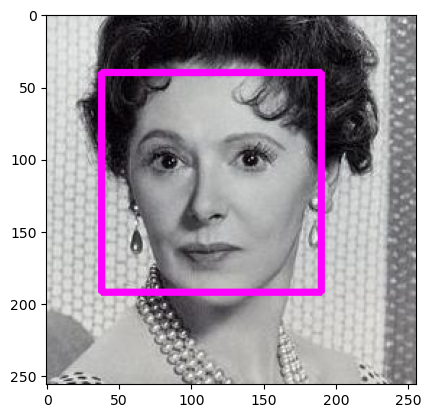

In [85]:
# detectAndDisplay(images[0])
plt.imshow(images[0])
plt.show()